In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 10000
training_epochs = 200
nb_classes = 16
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_0dB_NoC_16.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:13]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data)

(160000, 12) (160000, 4)
[[-0.85328174  2.523594   -0.3251292  ... -0.8490139   0.5279481
  -0.062126  ]
 [ 0.32477725 -0.07251213 -0.53251463 ...  0.782513    0.16790222
   0.64390427]
 [ 1.7100152   0.2861635  -2.2307868  ... -0.02103099 -0.03288438
  -0.83219635]
 ...
 [-0.27884564  0.28490534 -0.9203678  ... -0.46545234 -1.4236597
  -0.8726425 ]
 [-1.2125674  -0.16606879  2.6673083  ... -0.88394314  0.5912549
   1.0459253 ]
 [ 1.7010192   0.36013976  1.2937485  ...  0.2049777   1.0520097
   0.45138365]]


In [3]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[ 3]
 [ 3]
 [ 3]
 ...
 [12]
 [12]
 [12]]


In [4]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [6]:
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], units=768, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=384, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               9984      
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 384)               295296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                6160      
Total params: 311,440
Trainable params: 311,440
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = tf.model.fit(x_data, y_one_hot, batch_size=batch_size , validation_split=0.2, epochs=training_epochs)

Epoch 1/200
13/13 [==============================] - 1s 18ms/step - loss: 3.0447 - accuracy: 0.1459 - val_loss: 6.3635 - val_accuracy: 0.0058
Epoch 2/200
13/13 [==============================] - 0s 9ms/step - loss: 2.6056 - accuracy: 0.2810 - val_loss: 7.3167 - val_accuracy: 0.0163
Epoch 3/200
13/13 [==============================] - 0s 10ms/step - loss: 2.1696 - accuracy: 0.3847 - val_loss: 7.6767 - val_accuracy: 0.0271
Epoch 4/200
13/13 [==============================] - 0s 9ms/step - loss: 1.8918 - accuracy: 0.4404 - val_loss: 8.0396 - val_accuracy: 0.0341
Epoch 5/200
13/13 [==============================] - 0s 9ms/step - loss: 1.7459 - accuracy: 0.4737 - val_loss: 8.1455 - val_accuracy: 0.0366
Epoch 6/200
13/13 [==============================] - 0s 9ms/step - loss: 1.6389 - accuracy: 0.5019 - val_loss: 8.4996 - val_accuracy: 0.0381
Epoch 7/200
13/13 [==============================] - 0s 9ms/step - loss: 1.5542 - accuracy: 0.5257 - val_loss: 8.7858 - val_accuracy: 0.0384
Epoch 8/200

13/13 [==============================] - 0s 9ms/step - loss: 1.2448 - accuracy: 0.5846 - val_loss: 10.9601 - val_accuracy: 0.0388
Epoch 59/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2453 - accuracy: 0.5836 - val_loss: 10.9862 - val_accuracy: 0.0376
Epoch 60/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2420 - accuracy: 0.5841 - val_loss: 11.0627 - val_accuracy: 0.0403
Epoch 61/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2425 - accuracy: 0.5848 - val_loss: 10.9858 - val_accuracy: 0.0387
Epoch 62/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2394 - accuracy: 0.5854 - val_loss: 11.1255 - val_accuracy: 0.0394
Epoch 63/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2399 - accuracy: 0.5848 - val_loss: 11.0231 - val_accuracy: 0.0386
Epoch 64/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2389 - accuracy: 0.5850 - val_loss: 11.1627 - val_accuracy: 0.0395
Epoch 65/200

13/13 [==============================] - 0s 9ms/step - loss: 1.2061 - accuracy: 0.5905 - val_loss: 11.8869 - val_accuracy: 0.0386
Epoch 116/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2062 - accuracy: 0.5886 - val_loss: 11.9840 - val_accuracy: 0.0373
Epoch 117/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2041 - accuracy: 0.5898 - val_loss: 11.9980 - val_accuracy: 0.0381
Epoch 118/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2061 - accuracy: 0.5903 - val_loss: 11.9039 - val_accuracy: 0.0380
Epoch 119/200
13/13 [==============================] - 0s 10ms/step - loss: 1.2055 - accuracy: 0.5897 - val_loss: 11.9935 - val_accuracy: 0.0382
Epoch 120/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2023 - accuracy: 0.5907 - val_loss: 12.0095 - val_accuracy: 0.0400
Epoch 121/200
13/13 [==============================] - 0s 9ms/step - loss: 1.2025 - accuracy: 0.5898 - val_loss: 12.0990 - val_accuracy: 0.0398
Epoch

Epoch 172/200
13/13 [==============================] - 0s 9ms/step - loss: 1.1877 - accuracy: 0.5915 - val_loss: 12.7319 - val_accuracy: 0.0409
Epoch 173/200
13/13 [==============================] - 0s 9ms/step - loss: 1.1863 - accuracy: 0.5928 - val_loss: 12.6489 - val_accuracy: 0.0386
Epoch 174/200
13/13 [==============================] - 0s 9ms/step - loss: 1.1886 - accuracy: 0.5913 - val_loss: 12.6385 - val_accuracy: 0.0380
Epoch 175/200
13/13 [==============================] - 0s 9ms/step - loss: 1.1878 - accuracy: 0.5901 - val_loss: 12.7132 - val_accuracy: 0.0385
Epoch 176/200
13/13 [==============================] - 0s 9ms/step - loss: 1.1876 - accuracy: 0.5907 - val_loss: 12.7216 - val_accuracy: 0.0371
Epoch 177/200
13/13 [==============================] - 0s 9ms/step - loss: 1.1863 - accuracy: 0.5910 - val_loss: 12.7600 - val_accuracy: 0.0381
Epoch 178/200
13/13 [==============================] - 0s 9ms/step - loss: 1.1849 - accuracy: 0.5936 - val_loss: 12.8499 - val_accuracy:

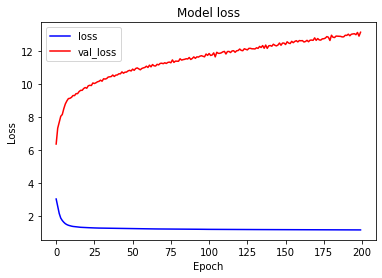

In [8]:
# 모델 손실 함수 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

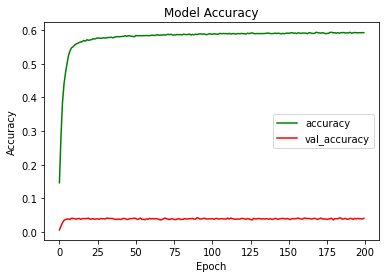

In [9]:
# 모델 정확도 시각화
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_0dB_NoC_16_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:13]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(32000, 12) (32000, 4)


In [11]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[ 3]
 [ 3]
 [ 3]
 ...
 [12]
 [12]
 [12]]


In [12]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
evaluation = tf.model.evaluate(x_test_data, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

1000/1000 [==============================] - 2s 1ms/step - loss: 3.5441 - accuracy: 0.4931
loss:  3.544100522994995
accuracy 0.49312499165534973


In [14]:
pre_error_cnt = 0
predict_x = tf.model.predict(x_test_data) 
pred = np.argmax(predict_x,axis=1)
for p, y in zip(pred, y_test_bit.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    if p != int(y):
        pre_error_cnt += 1
print("Prediction Error Count : ", pre_error_cnt)

[False] Prediction: 10 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 2 True Y: 3
[False] Prediction: 10 True Y: 3
[False] Prediction: 15 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 10 True Y: 3
[False] Prediction: 11 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 11 True Y: 3
[False] Prediction: 11 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 0 True Y: 3
[False] Prediction: 15 True Y: 3
[False] Prediction: 1 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 10 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 2 True Y: 3
[True] Prediction

[False] Prediction: 4 True Y: 2
[False] Prediction: 6 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 14 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 7 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[False] Prediction: 14 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 10 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 Tru

[False] Prediction: 7 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 7 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 5 True Y: 6
[False] Prediction: 4 True Y: 6
[False] Prediction: 7 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 11 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 14 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 2 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 3 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 5 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 7 True Y: 6
[True] Prediction: 6 True Y: 6
[False] Prediction: 4 True Y: 6
[False] Prediction: 7 True Y: 6
[False] Prediction: 1 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 Tr

[True] Prediction: 0 True Y: 0
[False] Prediction: 14 True Y: 0
[False] Prediction: 3 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 11 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 4 True Y: 0
[False] Prediction: 2 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 10 True Y: 0
[False] Prediction: 4 True Y: 0
[False] Prediction: 4 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y:

[True] Prediction: 5 True Y: 5
[False] Prediction: 7 True Y: 5
[False] Prediction: 7 True Y: 5
[True] Prediction: 5 True Y: 5
[False] Prediction: 11 True Y: 5
[True] Prediction: 5 True Y: 5
[False] Prediction: 3 True Y: 5
[True] Prediction: 5 True Y: 5
[False] Prediction: 1 True Y: 5
[True] Prediction: 5 True Y: 5
[False] Prediction: 4 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[False] Prediction: 11 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[False] Prediction: 3 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[False] Prediction: 4 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[False] Prediction: 4 True Y: 5
[True] Prediction: 5 True Y: 5
[True] Prediction: 5 True Y: 5
[False] Prediction: 7 True Y: 5
[True] Prediction: 5 True 

[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 15 True Y: 11
[False] Prediction: 3 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 9 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 3 True Y: 11
[False] Prediction: 6 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 2 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 14 True Y: 11
[False] Prediction: 15 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 14 True Y: 11
[False] Prediction: 1 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 7 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 10 True Y: 11
[True] Prediction: 11 True Y: 11
[True] Prediction: 11 True Y: 11
[False] Prediction: 15 True Y: 11
[Fal

[False] Prediction: 7 True Y: 15
[False] Prediction: 7 True Y: 15
[False] Prediction: 6 True Y: 15
[False] Prediction: 7 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 14 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 11 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 9 True Y: 15
[False] Prediction: 14 True Y: 15
[False] Prediction: 7 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 0 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 9 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 14 True Y: 15
[True] Prediction: 15 True Y: 15
[True] Prediction: 15 True Y: 15
[False] Prediction: 11 True Y: 15
[True

[False] Prediction: 11 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 5 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 5 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 1 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 1 True Y: 9
[False] Prediction: 11 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 10 True Y: 9
[False] Prediction: 1 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[True] Prediction: 9 True Y: 9
[False] Prediction: 1 True Y: 9
[False] Prediction: 5 True Y: 9
[False] Prediction: 1 True

[False] Prediction: 5 True Y: 13
[False] Prediction: 1 True Y: 13
[False] Prediction: 5 True Y: 13
[False] Prediction: 7 True Y: 13
[False] Prediction: 1 True Y: 13
[False] Prediction: 9 True Y: 13
[False] Prediction: 7 True Y: 13
[False] Prediction: 1 True Y: 13
[False] Prediction: 15 True Y: 13
[False] Prediction: 15 True Y: 13
[False] Prediction: 5 True Y: 13
[False] Prediction: 10 True Y: 13
[False] Prediction: 14 True Y: 13
[False] Prediction: 9 True Y: 13
[False] Prediction: 5 True Y: 13
[False] Prediction: 9 True Y: 13
[False] Prediction: 15 True Y: 13
[False] Prediction: 15 True Y: 13
[False] Prediction: 0 True Y: 13
[False] Prediction: 5 True Y: 13
[False] Prediction: 14 True Y: 13
[False] Prediction: 9 True Y: 13
[False] Prediction: 5 True Y: 13
[False] Prediction: 5 True Y: 13
[False] Prediction: 9 True Y: 13
[False] Prediction: 5 True Y: 13
[False] Prediction: 5 True Y: 13
[False] Prediction: 15 True Y: 13
[False] Prediction: 5 True Y: 13
[False] Prediction: 9 True Y: 13
[F

In [15]:
print(y_test_data.shape[0]/16)

2000.0


In [16]:
res_pred = pred.reshape(y_test_data.shape[0], 1)
error_cnt = 0
error = 0
for i in range(0, y_test_data.shape[0]):
    if res_pred[i] != y_test_bit[i]:
        print("False : {}".format(i))
        print("[{}] data : {}".format(i, y_test_data[i]))
        error += 1
        for n in range(0, y_test_data.shape[0], int(y_test_data.shape[0]/nb_classes)):
            if y_test_bit[n] == res_pred[i]:
                print("[{}] pred data: {}".format(n, y_test_data[n]))
                bit_error = 0
                for m in range(0, y_test_data.shape[1]): 
                    if y_test_data[i, m] != y_test_data[n, m]:
                        bit_error += 1
                        error_cnt += 1
                print("bit error count : ", bit_error)
                break
print("Error : {}".format(error))
print("Error Count: {}".format(error_cnt))

False : 0
[0] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 5
[5] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 6
[6] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 7
[7] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 10
[10] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 11
[11] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 18
[18] data : [-0.70710677

False : 274
[274] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 275
[275] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 276
[276] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 277
[277] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 278
[278] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 279
[279] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 281
[281] 

bit error count :  1
False : 903
[903] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 904
[904] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 906
[906] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 910
[910] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 917
[917] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 922
[922] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :

[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 1209
[1209] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 1212
[1212] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 1213
[1213] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 1215
[1215] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 1219
[1219] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 1220
[1220] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[

[1822] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 1825
[1825] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 1828
[1828] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 1829
[1829] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 1833
[1833] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 1834
[1834] data : [-0.70710677 -0.70710677  0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 1836
[1836] da

[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 2145
[2145] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 2146
[2146] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 2155
[2155] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 2158
[2158] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 2160
[2160] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 2163
[2163] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]


False : 2676
[2676] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 2679
[2679] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 2680
[2680] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 2681
[2681] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 2682
[2682] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 2683
[2683] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
Fal

[2960] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 2962
[2962] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 2963
[2963] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 2965
[2965] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 2967
[2967] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 2969
[2969] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 2970
[2970] d

[3524] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 3526
[3526] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 3528
[3528] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 3529
[3529] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 3532
[3532] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 3534
[3534] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 3535
[35

[3819] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 3821
[3821] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 3823
[3823] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 3825
[3825] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 3828
[3828] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 3829
[3829] data : [-0.70710677 -0.70710677  0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 3830
[38

[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 4464
[4464] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 4465
[4465] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 4467
[4467] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 4473
[4473] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 4477
[4477] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 4478
[4478] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[20

[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 4781
[4781] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 4788
[4788] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 4791
[4791] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 4797
[4797] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 4798
[4798] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 4800
[4800] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[16000] pre

[5457] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 5458
[5458] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 5461
[5461] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 5463
[5463] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 5464
[5464] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 5466
[5466] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 5468
[5

[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 5787
[5787] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 5788
[5788] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 5790
[5790] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 5791
[5791] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 5793
[5793] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 5796
[5796] data : [-0.70710677  0.70710677  0.70710677  0.70710677]
[14000] pre

[6408] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 6409
[6409] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 6410
[6410] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 6411
[6411] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 6414
[6414] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  3
False : 6416
[6416] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 6417

[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 6722
[6722] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 6725
[6725] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 6729
[6729] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 6730
[6730] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 6731
[6731] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 6733
[6733] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]


[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 7331
[7331] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  3
False : 7332
[7332] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 7334
[7334] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 7335
[7335] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 7340
[7340] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 7345
[7345] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[120

[7605] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 7607
[7607] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 7608
[7608] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 7611
[7611] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 7614
[7614] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  3
False : 7617
[7617] data : [-0.70710677  0.70710677  0.70710677 -0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 7622
[

[8213] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 8214
[8214] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 8215
[8215] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 8216
[8216] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 8217
[8217] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  3
False : 8222
[8222] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 8230
[8230] 

[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 8533
[8533] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 8535
[8535] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  3
False : 8536
[8536] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 8537
[8537] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 8538
[8538] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 8539
[8539] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[24000

[9311] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 9319
[9319] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 9320
[9320] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 9324
[9324] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 9325
[9325] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 9329
[9329] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 9331
[9331]

bit error count :  1
False : 9612
[9612] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 9614
[9614] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 9616
[9616] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 9620
[9620] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 9625
[9625] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 9626
[9626] data : [-0.70710677 -0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bi

[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 10313
[10313] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 10323
[10323] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 10325
[10325] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 10328
[10328] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 10329
[10329] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 10331
[10331] data : [-0.70710677 -0.70710677 -0.70710677 -0

[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 10653
[10653] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 10655
[10655] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 10661
[10661] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 10669
[10669] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 10670
[10670] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 10672
[10672] data : [-0.70710677 -0.70710677 -0.70710677 -

[11408] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 11409
[11409] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 11410
[11410] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 11413
[11413] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 11416
[11416] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 11419
[11419] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  3
False 

False : 11721
[11721] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 11724
[11724] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 11727
[11727] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 11731
[11731] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 11732
[11732] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  3
False : 11734
[11734] data : [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error cou

[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 12522
[12522] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 12523
[12523] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 12525
[12525] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 12526
[12526] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 12528
[12528] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 12529
[12529] data : [-0.70710677  0.70710677 -0.70710677  0.7

[12818] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 12821
[12821] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 12826
[12826] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 12827
[12827] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 12828
[12828] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 12829
[12829] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 128

bit error count :  1
False : 13624
[13624] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 13626
[13626] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 13632
[13632] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 13633
[13633] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 13635
[13635] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 13636
[13636] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710

False : 13991
[13991] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 13995
[13995] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 13997
[13997] data : [-0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 14001
[14001] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 14002
[14002] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 14003
[14003] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count 

[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 14795
[14795] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 14796
[14796] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 14798
[14798] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 14801
[14801] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 14802
[14802] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 14807
[14807] data : [-0.70710677  0.70710677 -0.70710677

[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 15121
[15121] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 15122
[15122] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 15123
[15123] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  3
False : 15124
[15124] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 15133
[15133] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 15134
[15134] data : [-0.70710677  0.70710677 -0.70710677 -0.707

[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 15854
[15854] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  4
False : 15857
[15857] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 15859
[15859] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 15860
[15860] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 15868
[15868] data : [-0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 15871
[15871] data : [-0.70710677  0.70710677 -0.70710677 -0

[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 16228
[16228] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 16229
[16229] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 16231
[16231] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 16233
[16233] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 16234
[16234] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 16237
[16237] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677

[16902] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 16903
[16903] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 16905
[16905] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 16910
[16910] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 16911
[16911] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 16913
[16913] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 1691

[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 17286
[17286] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 17288
[17288] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 17290
[17290] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 17293
[17293] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 17298
[17298] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 17299
[17299] data : [ 0.70710677 -0.70710677  0.70710677  0.7

[17974] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 17975
[17975] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 17978
[17978] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 17982
[17982] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 17983
[17983] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 17985
[17985] data : [ 0.70710677 -0.70710677  0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 17992
[1

bit error count :  1
False : 18364
[18364] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 18366
[18366] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 18372
[18372] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 18374
[18374] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 18375
[18375] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 18378
[18378] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.7071

[19061] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 19064
[19064] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 19068
[19068] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 19071
[19071] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 19074
[19074] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 19079
[19079] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False

[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 19400
[19400] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 19403
[19403] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 19405
[19405] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  3
False : 19407
[19407] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 19408
[19408] data : [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 19410
[19410] data : [ 0.70710677 -0.70710677  0.70710677 -0.70

[20172] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 20174
[20174] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 20175
[20175] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 20176
[20176] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 20178
[20178] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 20183
[20183] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 20184
[20184] data :

[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 20342
[20342] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 20345
[20345] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 20347
[20347] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 20350
[20350] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 20352
[20352] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 20354
[20354] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pred

[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 20593
[20593] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 20598
[20598] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 20600
[20600] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 20606
[20606] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 20608
[20608] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 20613
[20613] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[4000] pred dat

[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 21266
[21266] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 21268
[21268] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 21271
[21271] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 21272
[21272] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 21275
[21275] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 21279
[21279] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[16000] pr

[21431] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 21433
[21433] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 21436
[21436] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 21437
[21437] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 21442
[21442] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 21446
[21446] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 21448
[21448] data 

[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 21705
[21705] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 21708
[21708] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 21710
[21710] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 21712
[21712] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 21713
[21713] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 21716
[21716] data : [0.70710677 0.70710677 0.70710677 0.70710677]
[22000] pred data: 

bit error count :  2
False : 22396
[22396] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 22398
[22398] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 22399
[22399] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  3
False : 22400
[22400] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  3
False : 22403
[22403] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 22411
[22411] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit er

[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 22539
[22539] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 22541
[22541] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 22543
[22543] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 22544
[22544] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 22545
[22545] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 22547
[22547] data : [ 0.70710677  0.70710677  0.70710677 -0.70710

[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 22795
[22795] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 22796
[22796] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 22798
[22798] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 22801
[22801] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 22803
[22803] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 22804
[22804] data : [ 0.70710677  0.70710677  0.70710677 -0.70

[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 23494
[23494] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 23495
[23495] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 23499
[23499] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 23506
[23506] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 23507
[23507] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 23512
[23512] data : [ 0.70710677  0.70710677  0.70710677 -0.70710

[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 23873
[23873] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[4000] pred data: [-0.70710677  0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 23874
[23874] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 23879
[23879] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  3
False : 23885
[23885] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 23886
[23886] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 23889
[23889] data : [ 0.70710677  0.70710677  0.70710677 -0.70710677]


[24597] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 24598
[24598] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[2000] pred data: [-0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 24599
[24599] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 24600
[24600] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 24602
[24602] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 24609
[24609] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False :

bit error count :  2
False : 24978
[24978] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 24979
[24979] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 24984
[24984] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 24986
[24986] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 24988
[24988] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 24989
[24989] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.7

[25767] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 25769
[25769] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 25771
[25771] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 25778
[25778] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 25779
[25779] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  1
False : 25781
[25781] data : [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 

[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 26039
[26039] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 26040
[26040] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 26041
[26041] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26042
[26042] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 26043
[26043] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26044
[26044] data : [ 0.70710677 -0.70710677 -0.70710677 

[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 26313
[26313] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 26314
[26314] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 26315
[26315] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26316
[26316] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 26317
[26317] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 26318
[26318] data : [ 0.70710677 -0.70710677 -0.70710677 

[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 26439
[26439] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26440
[26440] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 26441
[26441] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 26442
[26442] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26443
[26443] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 26444
[26444] data : [ 0.70710677 -0.70710677 -0.70710677

[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 26707
[26707] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 26708
[26708] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26709
[26709] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26710
[26710] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26711
[26711] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 26712
[26712] data : [ 0.70710677 -0.70710677 -0.70710677

[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26835
[26835] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 26836
[26836] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  3
False : 26837
[26837] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 26838
[26838] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 26839
[26839] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 26840
[26840] data : [ 0.70710677 -0.70710677 -0.70710677 -0.7

[27087] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 27088
[27088] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 27089
[27089] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 27090
[27090] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27091
[27091] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27092
[27092] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2


bit error count :  1
False : 27212
[27212] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 27213
[27213] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27214
[27214] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 27215
[27215] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27216
[27216] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 27217
[27217] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 

bit error count :  1
False : 27550
[27550] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 27551
[27551] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 27552
[27552] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 27553
[27553] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 27554
[27554] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27555
[27555] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677 

False : 27657
[27657] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 27658
[27658] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27659
[27659] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 27660
[27660] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 27661
[27661] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 27662
[27662] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error

[27933] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 27934
[27934] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27935
[27935] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 27936
[27936] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 27937
[27937] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 27938
[27938] data : [ 0.70710677 -0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2


bit error count :  1
False : 28057
[28057] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28058
[28058] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 28059
[28059] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28060
[28060] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28061
[28061] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 28062
[28062] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.

[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 28337
[28337] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 28338
[28338] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 28339
[28339] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 28340
[28340] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28341
[28341] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28342
[28342] data : [ 0.70710677  0.70710677 -0.70710677  0.707106

[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28457
[28457] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28458
[28458] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 28459
[28459] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28460
[28460] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 28461
[28461] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28462
[28462] data : [ 0.70710677  0.70710677 -0.70710677  0.

[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 28748
[28748] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28749
[28749] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 28750
[28750] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 28751
[28751] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 28752
[28752] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28753
[28753] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677

[28861] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 28862
[28862] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 28863
[28863] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28864
[28864] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 28865
[28865] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 28866
[28866] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 2

[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 29155
[29155] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 29156
[29156] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 29157
[29157] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 29158
[29158] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 29159
[29159] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 29160
[29160] data : [ 0.70710677  0.70710677 -0.70710677 

[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 29275
[29275] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 29276
[29276] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 29277
[29277] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 29278
[29278] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[16000] pred data: [ 0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  2
False : 29279
[29279] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 29280
[29280] data : [ 0.70710677  0.70710677 -0.70710677  0.7

bit error count :  2
False : 29556
[29556] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 29557
[29557] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 29558
[29558] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 29559
[29559] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 29560
[29560] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 29561
[29561] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.707106

[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 29685
[29685] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 29686
[29686] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 29687
[29687] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 29688
[29688] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 29689
[29689] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 29690
[29690] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[200

[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 29956
[29956] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 29957
[29957] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  1
False : 29958
[29958] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  1
False : 29959
[29959] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  3
False : 29960
[29960] data : [ 0.70710677  0.70710677 -0.70710677  0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 29961
[29961] data : [ 0.70710677  0.70710677 -0.70710677  0.7

bit error count :  3
False : 30090
[30090] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30091
[30091] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 30092
[30092] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30093
[30093] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 30094
[30094] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30095
[30095] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677

[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30354
[30354] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 30355
[30355] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 30356
[30356] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30357
[30357] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30358
[30358] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30359
[30359] data : [ 0.70710677  0.70710677 -0.70710677

[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 30493
[30493] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30494
[30494] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 30495
[30495] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 30496
[30496] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 30497
[30497] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 30498
[30498] data : [ 0.70710677  0.70710677 -0.70710677

[30754] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 30755
[30755] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 30756
[30756] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 30757
[30757] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 30758
[30758] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 30759
[30759] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1


[30870] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30871
[30871] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30872
[30872] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 30873
[30873] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 30874
[30874] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 30875
[30875] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1


[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 31155
[31155] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 31156
[31156] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 31157
[31157] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31158
[31158] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 31159
[31159] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[18000] pred data: [ 0.70710677 -0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 31160
[31160] data : [ 0.70710677  0.70710677 -0.70710677

[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 31207
[31207] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 31208
[31208] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 31209
[31209] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 31210
[31210] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[10000] pred data: [-0.70710677 -0.70710677 -0.70710677 -0.70710677]
bit error count :  2
False : 31211
[31211] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31212
[31212] data : [ 0.70710677  0.70710677 -0.70710677 -0.

[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1
False : 31305
[31305] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[8000] pred data: [-0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  3
False : 31306
[31306] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 31307
[31307] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 31308
[31308] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31309
[31309] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31310
[31310] data : [ 0.70710677  0.70710677 -0.70710677 -0.7

[31554] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 31555
[31555] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31556
[31556] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31557
[31557] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31558
[31558] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31559
[31559] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[22000] pred data: [ 0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  1


[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31700
[31700] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31701
[31701] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31702
[31702] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31703
[31703] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 31704
[31704] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[14000] pred data: [-0.70710677  0.70710677 -0.70710677 -0.70710677]
bit error count :  1
False : 31705
[31705] data : [ 0.70710677  0.70710677 -0.70710677

[31957] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[6000] pred data: [-0.70710677  0.70710677  0.70710677 -0.70710677]
bit error count :  2
False : 31958
[31958] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[0] pred data: [-0.70710677 -0.70710677  0.70710677  0.70710677]
bit error count :  4
False : 31959
[31959] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31960
[31960] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[24000] pred data: [ 0.70710677 -0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 31961
[31961] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[20000] pred data: [0.70710677 0.70710677 0.70710677 0.70710677]
bit error count :  2
False : 31962
[31962] data : [ 0.70710677  0.70710677 -0.70710677 -0.70710677]
[12000] pred data: [-0.70710677  0.70710677 -0.70710677  0.70710677]
bit error count :  2
False : 3

In [17]:
BER = (error_cnt)/(y_test_data.shape[0]*2*2)
print("BER: {}".format(BER))

BER: 0.185875
